# IEEE-CIS Fraud Detection


- Ref : https://www.kaggle.com/c/ieee-fraud-detection/overview
- Data Description : https://www.kaggle.com/c/ieee-fraud-detection/data
- 문제 제공자 : IEEE Computational Intelligence Society  
- 문제 개요 : 카드 기록을 활용한 사기 거래 탐지  

- 참고  
    - 상당히 주관이 많이 들어가있고, 왜 그렇게 생각했는지 항상 고민해보기  
    - 데이터 컬럼이 비식별화되어 있어, 이전 문제와 다르게 **데이터 탐색을 통한 데이터에 대한 이해**가 매우 중요함
    - 실제 competition 데이터보다 훨씬 경량화가 되어있습니다. 참고하시길 바랍니다.  
    - 또한, 이 자료는 부산대 통계학과에서 수료한 [REN] "Real Data를 이용한 빅데이터 분석 및 머신러닝 A to Z" 특강을 참고하여 작성되었습니다.
    

# 1. 데이터 불러오기 및 기본 설정

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (20, 5)


import warnings
warnings.filterwarnings("ignore")

### 1.1 데이터 불러오기 및 불필요한 변수 삭제

In [11]:
df=pd.read_csv("sampled_train_transaction.csv")
print(df.shape)

(100000, 36)


In [12]:
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,C14,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,1.0,T,T,T,M2,F,T,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,1.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,1.0,T,T,T,M0,F,F,F,F,F
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,1.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3086995,0,2005989,55.385,C,2256,545.0,185.0,visa,226.0,...,1.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN
99996,3086996,0,2006074,117.000,W,2518,555.0,150.0,visa,226.0,...,2.0,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN
99997,3086997,0,2006135,50.000,S,2748,111.0,150.0,visa,228.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,3086998,0,2006177,100.000,H,16075,514.0,150.0,mastercard,102.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 비식별화된 Feature 들이 매우 많음
- 다수 결측이 포함되어 있음
- Imbalanced 문제가 존재함

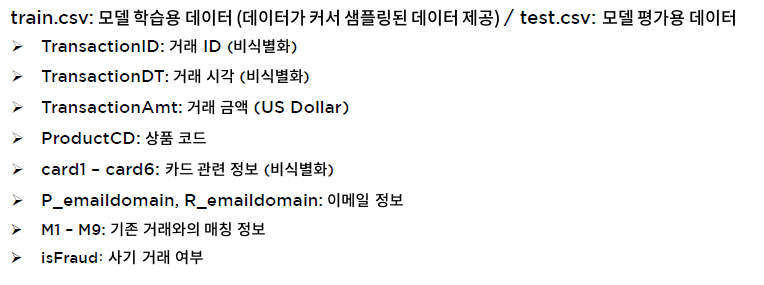

# Train_Test split

In [14]:
X = df.drop(['isFraud'], axis = 1)
Y = df['isFraud']

from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, random_state = 42)

# Train -> 분석 시작

In [15]:
Train=pd.concat([Train_X, Train_Y], axis = 1)

In [16]:
Train.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,M1,M2,M3,M4,M5,M6,M7,M8,M9,isFraud
98980,3085980,1990532,35.00,H,13906,369.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
69824,3056824,1562322,155.21,W,7508,321.0,150.0,visa,226.0,debit,...,T,T,T,NaN,NaN,NaN,T,T,T,0
9928,2996928,310922,31.96,W,1310,206.0,150.0,mastercard,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,0
75599,3062599,1649573,250.00,R,7526,520.0,150.0,american express,190.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
95621,3082621,1964876,59.00,W,1906,199.0,150.0,mastercard,224.0,debit,...,T,T,F,M1,F,F,T,T,T,0


In [17]:
Train.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'P_emaildomain',
       'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'C11', 'C12', 'C13', 'C14', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6',
       'M7', 'M8', 'M9', 'isFraud'],
      dtype='object')

In [18]:
Train.isFraud.mean()

0.026053333333333335

In [19]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 98980 to 15795
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   75000 non-null  int64  
 1   TransactionDT   75000 non-null  int64  
 2   TransactionAmt  75000 non-null  float64
 3   ProductCD       75000 non-null  object 
 4   card1           75000 non-null  int64  
 5   card2           73971 non-null  float64
 6   card3           74997 non-null  float64
 7   card4           74994 non-null  object 
 8   card5           74599 non-null  float64
 9   card6           74996 non-null  object 
 10  P_emaildomain   63425 non-null  object 
 11  R_emaildomain   25944 non-null  object 
 12  C1              75000 non-null  float64
 13  C2              75000 non-null  float64
 14  C3              75000 non-null  float64
 15  C4              75000 non-null  float64
 16  C5              75000 non-null  float64
 17  C6              75000 non-n

In [20]:
Train.drop(['TransactionID', 'TransactionDT'], axis = 1, inplace = True) # 도메인 지식하에, 불필요한 변수라 판단하여 삭제

# 2. 변수 탐색

### 2.1 타겟 비율 확인
- value_counts() 함수 -> 라벨(target) 분포 확인
- 사기 거래가 아닌 거래가 전체 거래의 97.4% 
- 클래스 불균형 문제가 발생할 확률 높음

In [21]:
Train_X = Train.drop(['isFraud'], axis = 1)
Train_Y = Train['isFraud']

In [22]:
Train_Y.value_counts(normalize=True)

0    0.973947
1    0.026053
Name: isFraud, dtype: float64

In [23]:
Test_Y.value_counts(normalize=True)

0    0.97572
1    0.02428
Name: isFraud, dtype: float64

### 2.2 변수별 값 정보 및 샘플 확인 : 컬럼별 유니크한 값 일부 확인
- Train_X에 포함된 모든 Column에 대해 Type, NaN수, nunique, unique sample를 확인  
- 이를 바탕으로 결측이 포함된 변수와 그렇지 않은 변수, 연속형 변수와 범주형 변수를 구분  

In [24]:
for col in Train_X.columns:
    print("변수: {}, 타입: {}, 결측 개수: {}, Category 수: {}, Categories Samples: {}".format(col, Train_X[col].dtype, Train_X[col].isnull().sum(), Train_X[col].nunique(), Train_X[col].unique()[:5]))

변수: TransactionAmt, 타입: float64, 결측 개수: 0, Category 수: 5442, Categories Samples: [ 35.   155.21  31.96 250.    59.  ]
변수: ProductCD, 타입: object, 결측 개수: 0, Category 수: 5, Categories Samples: ['H' 'W' 'R' 'C' 'S']
변수: card1, 타입: int64, 결측 개수: 0, Category 수: 6843, Categories Samples: [13906  7508  1310  7526  1906]
변수: card2, 타입: float64, 결측 개수: 1029, Category 수: 497, Categories Samples: [369. 321. 206. 520. 199.]
변수: card3, 타입: float64, 결측 개수: 3, Category 수: 72, Categories Samples: [150. 185. 190. 144. 147.]
변수: card4, 타입: object, 결측 개수: 6, Category 수: 4, Categories Samples: ['mastercard' 'visa' 'american express' 'discover' nan]
변수: card5, 타입: float64, 결측 개수: 401, Category 수: 82, Categories Samples: [117. 226. 166. 190. 224.]
변수: card6, 타입: object, 결측 개수: 4, Category 수: 4, Categories Samples: ['debit' 'credit' 'debit or credit' nan 'charge card']
변수: P_emaildomain, 타입: object, 결측 개수: 11575, Category 수: 59, Categories Samples: ['aol.com' 'anonymous.com' 'gmail.com' 'yahoo.com' nan]
변수: R

#### 탐색 내용 <br>
- TransactionAmt는 연속형 변수임이 확실해보임 (히스토그램 등으로 확인)
- ProductCD, card4, card6은 범주형 변수임이 확실해보임 (결측 포함)
- P_emaildomain, R_emaildomain은 구매자의 이메일 도메인으로 보임. 직관적으로 봤을 때, 유의한 의미가 있을지 의심되며, 둘은 관계가 있을 것으로 보임
- card1, card2, card3, card5은 연속형 변수임이 확실해보임 (히스토그램 등으로 확인)
- 많은 변수에서 결측이 포함되어 있음
- C3를 제외한 C1 ~ C14는 모두 연속형 변수인 것으로 보임. 비식별화되어 있어 대략적인 의미라도 추측을 해야 함
- 결측이 매우 많아, 곧바로 제거 또는 대체하기에는 부담이 있어, 결측 분포 확인 필요
- M1 ~ M9는 매칭 정보이며, 전부 범주형 변수임이 확실함. T는 매칭됨, F는 매칭되지 않음을 나타내는 것으로 보이며, 모두 결측이 포함

### 2.3 탐색을 위한 데이터 준비 : 특징과 타겟(label,target)데이터 병합

In [25]:
Train_df=pd.concat([Train_X,Train_Y],axis=1)
Train_df.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,...,M1,M2,M3,M4,M5,M6,M7,M8,M9,isFraud
98980,35.00,H,13906,369.0,150.0,mastercard,117.0,debit,aol.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
69824,155.21,W,7508,321.0,150.0,visa,226.0,debit,anonymous.com,NaN,...,T,T,T,NaN,NaN,NaN,T,T,T,0
9928,31.96,W,1310,206.0,150.0,mastercard,166.0,debit,gmail.com,NaN,...,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,0
75599,250.00,R,7526,520.0,150.0,american express,190.0,credit,anonymous.com,anonymous.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
95621,59.00,W,1906,199.0,150.0,mastercard,224.0,debit,gmail.com,NaN,...,T,T,F,M1,F,F,T,T,T,0


In [26]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 98980 to 15795
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionAmt  75000 non-null  float64
 1   ProductCD       75000 non-null  object 
 2   card1           75000 non-null  int64  
 3   card2           73971 non-null  float64
 4   card3           74997 non-null  float64
 5   card4           74994 non-null  object 
 6   card5           74599 non-null  float64
 7   card6           74996 non-null  object 
 8   P_emaildomain   63425 non-null  object 
 9   R_emaildomain   25944 non-null  object 
 10  C1              75000 non-null  float64
 11  C2              75000 non-null  float64
 12  C3              75000 non-null  float64
 13  C4              75000 non-null  float64
 14  C5              75000 non-null  float64
 15  C6              75000 non-null  float64
 16  C7              75000 non-null  float64
 17  C8              75000 non-n

### 2.4 범주형 변수 탐색
- 탐색방법  
(1) 결측을 문자로 변환 (탐색을 위해 임시 변환)  
(2) 변수별 분포 확인 (bar plot)  
(3) 변수와 특징 간 관계 확인 (groupby, 사기 유무에 따른)  



- 탐색결과 활용  
(1) 주요 값 기준 이진화  
(2) 더미화

#### 2.4.1 ProductCD

In [27]:
Train_df['ProductCD'].isnull().sum() # 결측이 전혀없어서, 결측을 문자로 변환할 필요 없음

0

<AxesSubplot:>

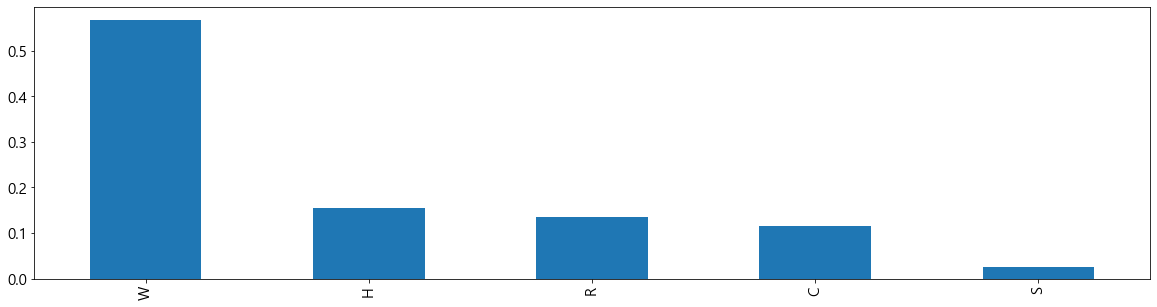

In [28]:
Train_df['ProductCD'].value_counts(normalize = True).plot(kind = 'bar') # value_counts에 대한 bar plot 생성
# ProdudctCD가 W가 매우 높은 비율을 차지하며, S는 1% 가량됨을 확인

In [29]:
# 상품별로 차이가 존재함을 확인 (다만, H와 W는 거의 유사하다고 판단됨)
# 상태 공간의 크기가 그리 크지 않으니, 굳이 변수 값의 군집화는 수행하지 않고 더미화를 하기로 결정
Train_df.groupby('ProductCD')['isFraud'].mean()

ProductCD
C    0.090941
H    0.021194
R    0.011078
S    0.026562
W    0.017871
Name: isFraud, dtype: float64

- C의 경우 다른 경우보다 isFraud 의 비율이 높은 것을 볼 수 있다.

#### 2.4.2card4

In [30]:
Train_df['card4'].isnull().sum() # 결측이 6개밖에 되지 않음 ==> 전부 최빈값으로 대체

6

<AxesSubplot:>

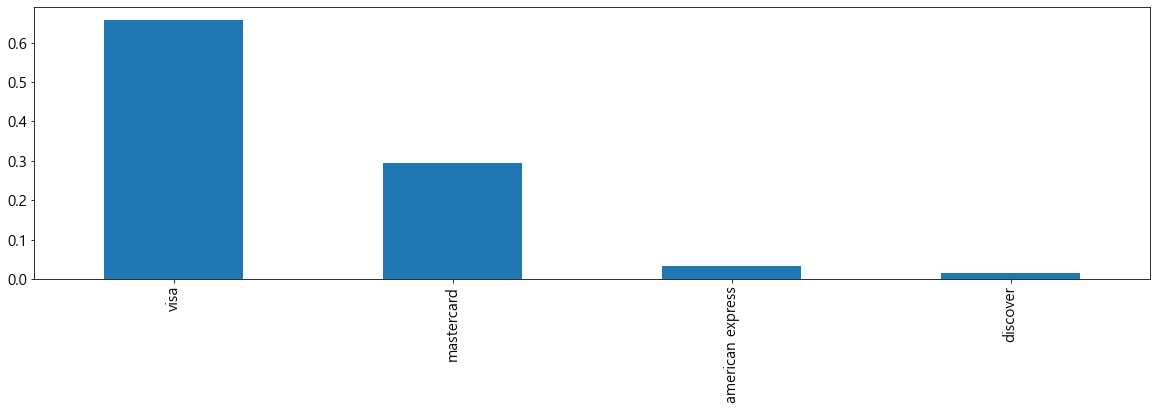

In [31]:
Train_df['card4'].value_counts(normalize = True).plot(kind = 'bar') # value_counts에 대한 bar plot 생성
# visa와 master card가 매우 높은 비율을 차지하며, discover는 거의 발생하지 않음

In [32]:
Train_df.groupby('card4')['isFraud'].mean()

card4
american express    0.010586
discover            0.025203
mastercard          0.029373
visa                0.025315
Name: isFraud, dtype: float64

- 거래의 대다수를 차지하는 visa와 mastercard의 값이 유사
- american express만 유독 값이 작으며 해당 값의 빈도가 높지 않음 => 해당 변수를 american express란 변수로 이진화
- 따라서 결측을 특별히 제거할 필요가 없음

#### 2.4.3 card 6

In [33]:
Train_df['card6'].isnull().sum() # 결측이 4개밖에 되지 않음 ==> 전부 최빈값으로 대체

4

<AxesSubplot:>

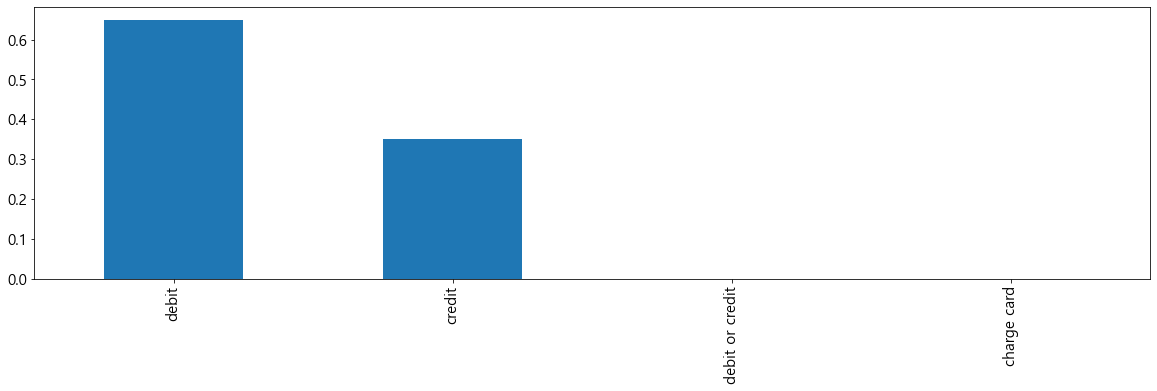

In [34]:
Train_df['card6'].value_counts(normalize = True).plot(kind = 'bar') # value_counts에 대한 bar plot 생성
# debit과 credit이 대다수를 차지. 다른 값들은 육안으로 확인이 불가능한 수준

In [35]:
Train_df['card6'].value_counts(normalize = False) # debit or credit, charge card는 빈도가 매우 적음

debit              48673
credit             26318
debit or credit        3
charge card            2
Name: card6, dtype: int64

In [36]:
Train_df.groupby('card6')['isFraud'].mean()

card6
charge card        0.000000
credit             0.037427
debit              0.019867
debit or credit    0.000000
Name: isFraud, dtype: float64

- credit과 debit의 차이가 존재
- charge card, debit or credit은 전부 0임을 확인 ==> 그러나 빈도 자체가 매우 적어서 그런 것이라 예상됨
- 따라서 credit인지 나타내는 변수로만 변환

#### 2.4.3 P_emaildomain 과 R_emaildomain

- 이전 탐색에서 각각의 상태 공간 크기가 60, 61임을 확인 (대다수가 gmail 혹은 yahoo 메일임)
- 또한, 결측이 매우 많았는데, email이 결측이라는 것이 어떤 의미가 있을것이라 의심됨
- 샘플의 개수를 고려하더라도 그 크기가 큰 범주형 변수라고 판단 가능
- 두 변수간 관계가 있으리라 쉽게 판단 가능
- 또한, .를 기준으로 앞쪽에는 실제 도메인이, 뒤쪽에는 com, net 등이 포함되어 있어 분할 필요

In [37]:
Train_df['P_emaildomain'].value_counts() # gmail vs gmail.com etc...

gmail.com           27239
yahoo.com           11959
anonymous.com        6439
hotmail.com          6116
aol.com              3672
comcast.net          1410
icloud.com            641
msn.com               602
outlook.com           548
att.net               518
sbcglobal.net         483
verizon.net           463
live.com              366
bellsouth.net         336
cox.net               287
me.com                283
ymail.com             281
yahoo.com.mx          223
charter.net           159
optonline.net         158
mac.com                97
rocketmail.com         94
live.com.mx            93
earthlink.net          75
mail.com               60
embarqmail.com         57
roadrunner.com         53
gmail                  47
outlook.es             45
windstream.net         40
juno.com               40
frontier.com           38
hotmail.es             38
twc.com                36
netzero.com            34
frontiernet.net        33
cfl.rr.com             31
aim.com                31
web.de      

In [38]:
Train_df['R_emaildomain'].value_counts()

gmail.com           9852
anonymous.com       5195
hotmail.com         4072
yahoo.com           2412
aol.com             1008
comcast.net          597
outlook.com          316
icloud.com           229
yahoo.com.mx         223
msn.com              214
verizon.net          189
cox.net              160
sbcglobal.net        156
me.com               141
bellsouth.net        138
live.com             131
att.net              119
live.com.mx           93
ymail.com             63
mac.com               54
optonline.net         50
outlook.es            45
hotmail.es            38
mail.com              32
charter.net           30
web.de                27
prodigy.net.mx        27
embarqmail.com        24
juno.com              23
hotmail.fr            22
frontier.com          22
yahoo.fr              19
earthlink.net         19
rocketmail.com        17
roadrunner.com        16
windstream.net        15
cfl.rr.com            14
gmx.de                13
suddenlink.net        12
gmail                 12


In [39]:
# 결측이 의미가 있는지 확인 (두 변수 모두 결측이 많다는 것은 위에서 확인함)
# 결측을 나타내는 변수 생성
Train_df['NA_P_emaildomain'] = Train_df['P_emaildomain'].isnull().astype(int)
Train_df['NA_R_emaildomain'] = Train_df['R_emaildomain'].isnull().astype(int)

In [40]:
Train_df #결측 여부 체크가능

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,...,M3,M4,M5,M6,M7,M8,M9,isFraud,NA_P_emaildomain,NA_R_emaildomain
98980,35.00,H,13906,369.0,150.0,mastercard,117.0,debit,aol.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
69824,155.21,W,7508,321.0,150.0,visa,226.0,debit,anonymous.com,NaN,...,T,NaN,NaN,NaN,T,T,T,0,0,1
9928,31.96,W,1310,206.0,150.0,mastercard,166.0,debit,gmail.com,NaN,...,NaN,NaN,NaN,T,NaN,NaN,NaN,0,0,1
75599,250.00,R,7526,520.0,150.0,american express,190.0,credit,anonymous.com,anonymous.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
95621,59.00,W,1906,199.0,150.0,mastercard,224.0,debit,gmail.com,NaN,...,F,M1,F,F,T,T,T,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,10.99,W,10989,360.0,150.0,visa,166.0,debit,gmail.com,NaN,...,T,M0,F,F,NaN,NaN,NaN,0,0,1
54886,117.00,W,11454,111.0,150.0,visa,226.0,debit,hotmail.com,NaN,...,NaN,M0,F,T,NaN,NaN,NaN,0,0,1
76820,67.95,W,1974,111.0,150.0,visa,226.0,debit,NaN,NaN,...,T,NaN,NaN,T,NaN,NaN,NaN,0,1,1
860,47.95,W,15497,490.0,150.0,visa,226.0,debit,gmail.com,NaN,...,NaN,NaN,NaN,F,NaN,NaN,NaN,0,0,1


In [41]:
Train_df.groupby('NA_P_emaildomain')['isFraud'].mean()

NA_P_emaildomain
0    0.026488
1    0.023672
Name: isFraud, dtype: float64

- P_emaildomain은 크게 문제 없어보임
- 0.002 차이나지 않는가? -> 다 반영하면 과적합 이슈에 부딪힐 수 있음

In [42]:
Train_df.groupby('NA_R_emaildomain')['isFraud'].mean()

NA_R_emaildomain
0    0.043478
1    0.016838
Name: isFraud, dtype: float64

- R_emaildomain은 오히려 결측이 발생하지 않았을 때 사기인 경우가 더 많음을 확인 ==> 변수로 활용


#### pandas col -> str.function 함수 -> 문자를 기준으로 정보를 얻을 수 있다.

In [43]:
# 유의한 도메인만 가져와서 추가 탐색 수행
Train_df['P_emaildomain'] = Train_df['P_emaildomain'].str.split('.', expand = True).iloc[:, 0]
Train_df['R_emaildomain'] = Train_df['R_emaildomain'].str.split('.', expand = True).iloc[:, 0]

In [44]:
Train_df.groupby('P_emaildomain')['isFraud'].mean()

P_emaildomain
aim             0.032258
anonymous       0.010561
aol             0.014978
att             0.007722
bellsouth       0.000000
cableone        0.000000
centurylink     0.000000
cfl             0.000000
charter         0.000000
comcast         0.008511
cox             0.003484
earthlink       0.000000
embarqmail      0.000000
frontier        0.000000
frontiernet     0.151515
gmail           0.035220
gmx             0.000000
hotmail         0.048666
icloud          0.039002
juno            0.000000
live            0.019565
mac             0.000000
mail            0.100000
me              0.021201
msn             0.016611
netzero         0.000000
optonline       0.000000
outlook         0.075885
prodigy         0.000000
protonmail      0.142857
ptd             0.000000
q               0.000000
roadrunner      0.000000
rocketmail      0.000000
sbcglobal       0.002070
sc              0.000000
servicios-ta    0.000000
suddenlink      0.000000
twc             0.000000
verizon    

- P_emaildomain에 따른 isFraud의 평균 차이가 존재함
- 다만, aim.com, cableone.net 등은 그 빈도가 매우 적어서 이 차이가 유의한 것인지 판단이 불가 -> 판단 유보

In [45]:
Train_df.groupby('R_emaildomain')['isFraud'].mean()

R_emaildomain
aim             0.125000
anonymous       0.010202
aol             0.010913
att             0.000000
bellsouth       0.000000
cableone        0.000000
centurylink     0.000000
cfl             0.000000
charter         0.000000
comcast         0.015075
cox             0.012500
earthlink       0.000000
embarqmail      0.000000
frontier        0.000000
frontiernet     0.000000
gmail           0.064984
gmx             0.000000
hotmail         0.065475
icloud          0.043668
juno            0.000000
live            0.000000
mac             0.000000
mail            0.062500
me              0.000000
msn             0.004673
netzero         0.000000
optonline       0.000000
outlook         0.105263
prodigy         0.000000
protonmail      0.500000
ptd             0.000000
q               0.000000
roadrunner      0.000000
rocketmail      0.000000
sbcglobal       0.000000
scranton        0.000000
servicios-ta    0.000000
suddenlink      0.000000
twc             0.000000
verizon    

In [46]:
# R_emaildomain에 따른 isFraud의 평균 차이가 존재함
# 다만, 대다수 값이 그 빈도가 매우 적어서 이 차이가 유의한 것인지 판단이 불가

In [47]:
# 같은 거래라면 P_emaildomain과 R_emaildomain이 특정 관계가 있지 않을까?
# 파생 변수 추가 및 확인: 실제 라벨의 분포를 고려했을 때, 

Train_df['same_emaildomain'] = (Train_df['P_emaildomain'] == Train_df['R_emaildomain']).astype(int)
print("same_emaildomain 비율 \n", Train_df['same_emaildomain'].value_counts(normalize=True))

same_emaildomain 비율 
 0    0.748693
1    0.251307
Name: same_emaildomain, dtype: float64


In [48]:
print(Train_df.groupby('same_emaildomain')['isFraud'].mean()) # 이메일이 같은 경우에 사기확률이 상승함

same_emaildomain
0    0.016633
1    0.054117
Name: isFraud, dtype: float64


- 차이가 난다 -> 변수로 사용 가능성 고려


### 어떠한 변수들이 y와의 관계가 있는지 최대한 check 하면서 진행

#### 2.4.5 c3

In [49]:
# 결측이 없음
# 변수 타입은 float 인데, 상태 공간의 크기가 크지 않음 ==> 범주형으로 판단을 해볼 수도?

In [50]:
# 0.0 값이 대다수임을 확인
Train_df['C3'].value_counts(normalize = True)

0.0    0.988747
1.0    0.010400
2.0    0.000693
3.0    0.000120
9.0    0.000013
8.0    0.000013
4.0    0.000013
Name: C3, dtype: float64

In [51]:
Train_df['C3'].value_counts(normalize = False)

0.0    74156
1.0      780
2.0       52
3.0        9
9.0        1
8.0        1
4.0        1
Name: C3, dtype: int64

In [52]:
# 그룹별 isFraud의 평균
Train_df.groupby('C3')['isFraud'].mean()

C3
0.0    0.026336
1.0    0.001282
2.0    0.000000
3.0    0.000000
4.0    0.000000
8.0    0.000000
9.0    0.000000
Name: isFraud, dtype: float64

- 2.0 이상의 값은 거의 존재하지 않기 때문에, 우연히 평균이 0이 나왔을 것이란 추측이 가능
- 0.0은 자주 등장했기 때문에, 전체 데이터에서의 라벨의 평균과 유사
- 1.0은 빈도가 어느정도 있음에도 불구하고 라벨의 평균과 크게 다름
- (조금은 위험한) 가설 수립: C3값이 1 이상인지 아닌지에 따른 차이가 존재할 것이다! => C3_over_1 변수 생성

### 2.4.6 M관련 변수
- M1 - M9 는 결측도 절반 가까이를 포함하여, 대체하는 것은 어려울 것으로 예상됨
- 모두 범주형 변수이며, 값의 출현 패턴이 유사하니 동시에 탐색 수행

In [53]:
# 탐색을 위해, 모든 결측값을 우선 대체
M_columns = ['M' + str(i) for i in range(1, 10)]
Train_df[M_columns] = Train_df[M_columns].fillna("결측")

In [54]:
## 변수 분포 확인
# 1. 결측이 매우 많음 => 단순 대체 및 제거 불가
# 2. M4를 제외하고는 T (True), F (False로 정의됨)
for col in M_columns:
    print(Train_df[col].value_counts())
    print('\n')


결측    51321
T     23679
Name: M1, dtype: int64


결측    51321
T     21297
F      2382
Name: M2, dtype: int64


결측    51321
T     18486
F      5193
Name: M3, dtype: int64


결측    43113
M0    19708
M2     7115
M1     5064
Name: M4, dtype: int64


결측    51620
F     13011
T     10369
Name: M5, dtype: int64


결측    34232
F     21927
T     18841
Name: M6, dtype: int64


결측    62902
F     10357
T      1741
Name: M7, dtype: int64


결측    62902
F      7500
T      4598
Name: M8, dtype: int64


결측    62902
T     10407
F      1691
Name: M9, dtype: int64




In [55]:
# 결측 여부에 따른 target 값의 평균
for col in M_columns:
    print(Train_df.groupby(col)['isFraud'].mean())
    print('\n')

M1
T     0.016681
결측    0.030377
Name: isFraud, dtype: float64


M2
F     0.034005
T     0.014744
결측    0.030377
Name: isFraud, dtype: float64


M3
F     0.027922
T     0.013524
결측    0.030377
Name: isFraud, dtype: float64


M4
M0    0.035722
M1    0.019945
M2    0.088405
결측    0.012061
Name: isFraud, dtype: float64


M5
F     0.018138
T     0.041373
결측    0.024971
Name: isFraud, dtype: float64


M6
F     0.023624
T     0.012101
결측    0.035289
Name: isFraud, dtype: float64


M7
F     0.013035
T     0.007467
결측    0.028711
Name: isFraud, dtype: float64


M8
F     0.013867
T     0.009569
결측    0.028711
Name: isFraud, dtype: float64


M9
F     0.013010
T     0.012107
결측    0.028711
Name: isFraud, dtype: float64




- 변수 값별 라벨 확인: 값별로 차이가 있으며, 결측 자체로도 의미가 있어보임
- 즉, 결측이냐 아니냐에 따라서 Y의 차이가 나는 것을 직관적으로도 알 수 있다.
- 결측 자체로도 의미가 있으니, 결측을 따로 대체 후 더미화 필요

## 2.5 연속형 변수 탐색
- 탐색방법  
(1) 변수별 분포 확인 (히스토그램)  
(2) 변수와 라벨 간 관계 파악 (박스플롯)  

- 탐색결과활용  
(1) 연속형 변수 이진화  
(2) 변수 치우침 제거  

- 선형관계가 보이지 않는 변수가 대부분이라 트리 기반의 앙상블 모델을 활용하기로 의사결정  

### 2.5.1 TransasctionAmt

<AxesSubplot:>

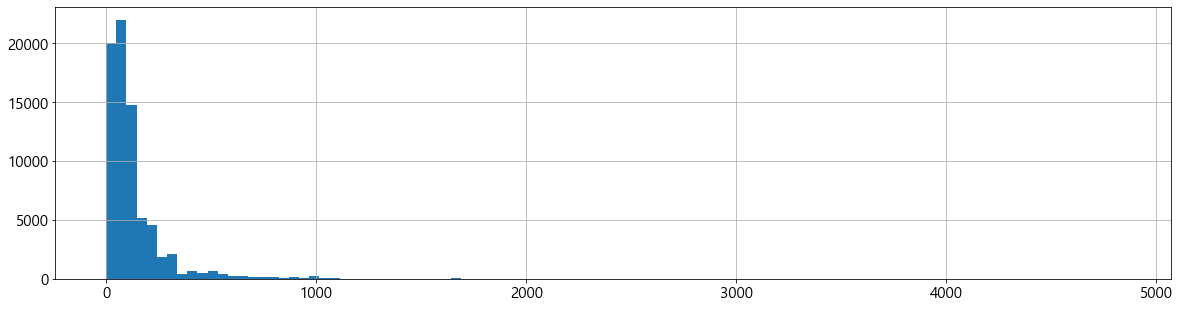

In [56]:
Train_df['TransactionAmt'].hist(bins = 100)

In [57]:
Train_df['TransactionAmt'].describe()

count    75000.000000
mean       130.222620
std        206.503908
min          0.424000
25%         45.000000
50%         75.000000
75%        134.950000
max       4829.950000
Name: TransactionAmt, dtype: float64

- 히스토그램 -> 대다수가 1000달러 이하 & 치우침
- 한쪽에 매우 치우침을 확인함: 거래 금액이 매우 크거나 작은 것 자체가 특징이 되지 않을까?
- 전부 양수이고, 굉장히 많이 퍼져있는 것을 알 수 있다. 75Q와 평균과 비슷하다
- max가 매우 크기 때문에, 의심을 해볼만함

([<matplotlib.axis.XTick at 0x1bc4ec0b490>,
 [Text(1, 0, 'Fraud'), Text(2, 0, 'not Fraud')])

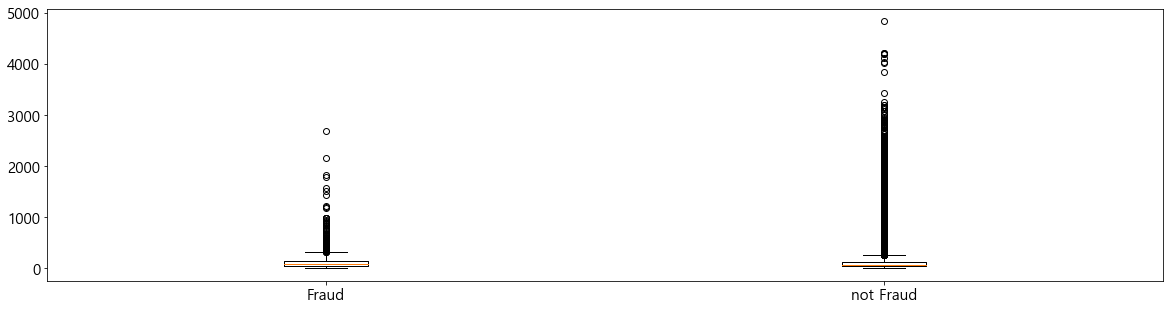

In [58]:
# 라벨과 연속형변수 비교
TransactionAmt_Fraud = Train_df['TransactionAmt'].loc[Train_df['isFraud'] == 1]
TransactionAmt_not_Fraud = Train_df['TransactionAmt'].loc[Train_df['isFraud'] == 0]

# 대부분 이상치로 판단되어 정상적인 해석이 쉽지 않음 (다만, Fraud인 경우의 범위가 더 좁음)
plt.boxplot([TransactionAmt_Fraud, TransactionAmt_not_Fraud])
plt.xticks([1, 2], ['Fraud', 'not Fraud'])

In [59]:
# 사기 거래의 경우 describe()
TransactionAmt_Fraud.describe()

count    1954.000000
mean      132.173121
std       178.683546
min         0.424000
25%        39.000000
50%        78.788000
75%       150.000000
max      2680.990000
Name: TransactionAmt, dtype: float64

In [60]:
# 사기 거래가 아닌 경우
TransactionAmt_not_Fraud.describe()

count    73046.000000
mean       130.170443
std        207.197630
min          1.000000
25%         45.000000
50%         75.000000
75%        131.000000
max       4829.950000
Name: TransactionAmt, dtype: float64

-  평균의 차이는 비슷, 75% Quantile 차이가 조금 존재함
- 사기 거래 유무에 따라 특별한 관계를 찾기는 어려움
- 따라서 라벨과 관계를 고려하지 않고, 치우침만 해결하기로 결정

### 2.5.2 C 관련 변수 (범주형 변수 C3 제외)

In [61]:
# 변수 목록 생성
# c3는 제외
C_columns = ['C' + str(i) for i in range(1, 15) if i != 3]
C_columns

['C1',
 'C2',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14']

In [62]:
# describe()
Train_df[C_columns].describe()

,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,41.151000,47.912013,19.233333,4.17904,23.212640,15.887733,26.227787,3.277707,26.797080,29.765480,22.257813,45.584147,17.030920
std,312.502121,364.117106,158.342430,21.65999,159.083634,151.516922,231.963942,13.986498,232.707598,218.589395,212.667430,221.574753,104.011679
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,2.000000,2.000000,1.000000,1.00000,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,9.000000,2.000000
max,4682.000000,5690.000000,2251.000000,295.00000,2251.000000,2253.000000,3328.000000,194.000000,3254.000000,3186.000000,3186.000000,2915.000000,1426.000000


- 대다수의 변수가 75%값에 비해 max값은 매우 큼 -> 이상하다? -> 90% 이상 파악해보기


In [63]:
# 상위 90% 값 확인
Train_df[C_columns].quantile(0.90)

C1      6.0
C2      6.0
C4      1.0
C5      2.0
C6      4.0
C7      1.0
C8      1.0
C9      3.0
C10     1.0
C11     4.0
C12     1.0
C13    33.0
C14     5.0
Name: 0.9, dtype: float64

In [64]:
# 상위 95%값 확인
Train_df[C_columns].quantile(0.95)

C1      49.0
C2      53.0
C4       2.0
C5       5.0
C6      29.0
C7       1.0
C8       2.0
C9       6.0
C10      2.0
C11     32.0
C12      1.0
C13    157.0
C14     30.0
Name: 0.95, dtype: float64

In [65]:
# 상위 99%값 확인
# 변수마다 어디서 끊어야할지 reasonable한 지점을 찾기가 어렵다
Train_df[C_columns].quantile(0.99)

C1     1184.00
C2     1490.01
C4      817.00
C5      136.00
C6      827.00
C7      638.01
C8      925.02
C9       82.00
C10    1052.01
C11     928.01
C12     869.02
C13     888.01
C14     568.00
Name: 0.99, dtype: float64

- C 관련 변수는 모두 치우침이 매우 심각함
- 상위 95%값과 99% 값의 차이가 너무 많이 남
- 변수로 활용하기 어려워보임 -> 
- 이진화를 하기에는 자르는 구간 설정이 어려움 -> 
- 해당 특징을 사용하려면 트리 계열 모델 사용이 필수적

### 2.5.3 Card 1,2,3,5

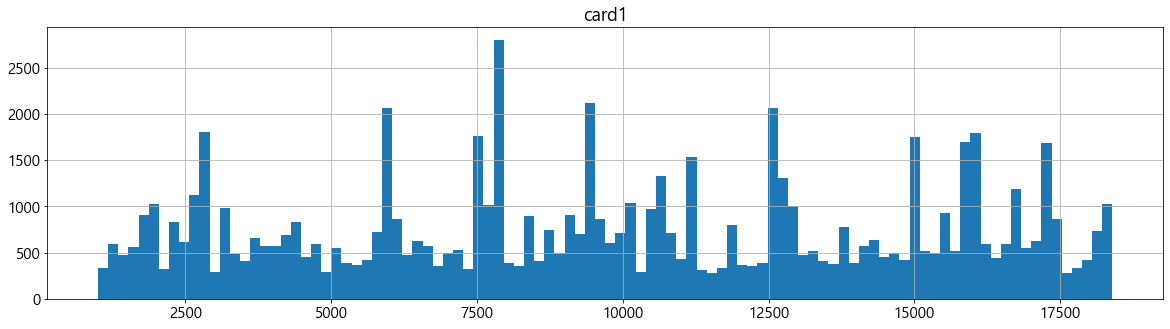

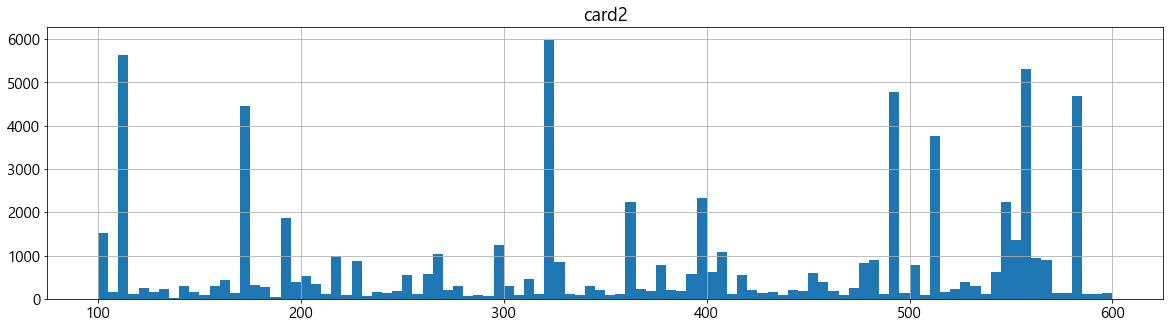

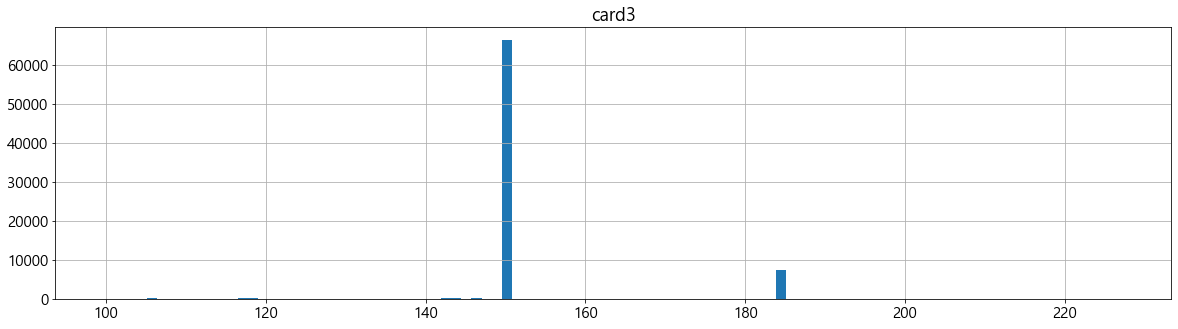

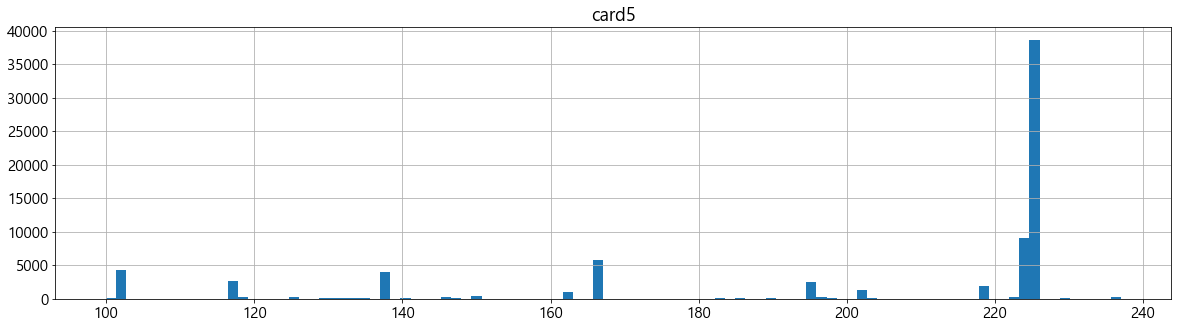

In [66]:
card_columns = ['card1', 'card2', 'card3', 'card5']

for col in card_columns:
    plt.title(col)
    Train_df[col].hist(bins = 100)
    plt.show()

- 히스토그램 확인: card3과 card5의 분포가 특이함 (치우침이 특정 방향으로 일어나지는 않았음. 사실상 범주 변수로 보는 것이 바람직)
- 연속형 변수로 간주할 수 있는 card1과 card3은 결측 처리 필요

In [67]:
# 값의 분포 확인
Train_df[card_columns].describe()

,card1,card2,card3,card5
count,75000.000000,73971.000000,74997.000000,74599.000000
mean,9886.566853,370.992227,153.260237,200.081020
std,4932.240514,159.345323,11.209360,40.912836
min,1001.000000,100.000000,100.000000,100.000000
25%,6019.000000,215.000000,150.000000,166.000000
50%,9635.000000,387.000000,150.000000,226.000000
75%,14290.000000,514.000000,150.000000,226.000000
max,18395.000000,600.000000,227.000000,237.000000


- card3은 25% 이상 모두 150인것을 확인(연속형 변수인데?)
- card5도 마찬가지 논리로 다르게 생각할 수 있다.

In [68]:
# card 3
Train_df['card3'].value_counts()

150.0    66407
185.0     7292
144.0      212
106.0      139
146.0      119
         ...  
105.0        1
199.0        1
111.0        1
177.0        1
220.0        1
Name: card3, Length: 72, dtype: int64

In [69]:
Train_df['card3'].value_counts(normalize=True) # 150인지, 185인지 아닌지를 나타내는 변수로 변환 필요

150.0    0.885462
185.0    0.097231
144.0    0.002827
106.0    0.001853
146.0    0.001587
           ...   
105.0    0.000013
199.0    0.000013
111.0    0.000013
177.0    0.000013
220.0    0.000013
Name: card3, Length: 72, dtype: float64

In [70]:
Train_df['card3_150'] = (Train_df['card3'] == 150).astype(int)
Train_df['card3_185'] = (Train_df['card3'] == 185).astype(int)

In [71]:
Train_df.groupby('card3_150')['isFraud'].mean() # 차이가 있음을 확인

card3_150
0    0.089724
1    0.017814
Name: isFraud, dtype: float64

In [72]:
Train_df.groupby('card3_185')['isFraud'].mean() # 차이가 있음을 확인

card3_185
0    0.017827
1    0.102441
Name: isFraud, dtype: float64

In [73]:
# card 5
Train_df['card5'].value_counts() 

226.0    38596
224.0     9106
166.0     5745
102.0     4322
117.0     2697
         ...  
187.0        1
173.0        1
180.0        1
184.0        1
169.0        1
Name: card5, Length: 82, dtype: int64

In [74]:
# 사전 EDA -> 226인지 아닌지를 나타내는 변수로 변환 필요
Train_df['card5_226'] = (Train_df['card5'] == 226).astype(int)

In [75]:
Train_df.groupby('card5_226')['isFraud'].mean() # 차이가 있음을 확인

card5_226
0    0.031178
1    0.021220
Name: isFraud, dtype: float64

# 3. 데이터 전처리
- 탐색한 내용들을 반영

## 3.1 이진화
- 특정 값을 갖는 변수로 변환하면, 결측 값은 자동을 0을 가지게 되므로 결측처리도 생략 가능


#### Card4 이진화 => american express 라는 값을 가지는지 여부를 나타내는 변수로 변환

In [76]:
# 학습데이터
Train_X['american_express'] = 0
Train_X['american_express']=Train_X['american_express']+(Train_X['card4'] == 'american express').astype(int)

# 기존 변수는 제거
Train_X.drop('card4', axis = 1, inplace = True) #memory

In [77]:
Train_X

,TransactionAmt,ProductCD,card1,card2,card3,card5,card6,P_emaildomain,R_emaildomain,C1,...,M1,M2,M3,M4,M5,M6,M7,M8,M9,american_express
98980,35.00,H,13906,369.0,150.0,117.0,debit,aol.com,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
69824,155.21,W,7508,321.0,150.0,226.0,debit,anonymous.com,NaN,1.0,...,T,T,T,NaN,NaN,NaN,T,T,T,0
9928,31.96,W,1310,206.0,150.0,166.0,debit,gmail.com,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,0
75599,250.00,R,7526,520.0,150.0,190.0,credit,anonymous.com,anonymous.com,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
95621,59.00,W,1906,199.0,150.0,224.0,debit,gmail.com,NaN,1.0,...,T,T,F,M1,F,F,T,T,T,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,10.99,W,10989,360.0,150.0,166.0,debit,gmail.com,NaN,1.0,...,T,T,T,M0,F,F,NaN,NaN,NaN,0
54886,117.00,W,11454,111.0,150.0,226.0,debit,hotmail.com,NaN,2.0,...,NaN,NaN,NaN,M0,F,T,NaN,NaN,NaN,0
76820,67.95,W,1974,111.0,150.0,226.0,debit,NaN,NaN,27.0,...,T,T,T,NaN,NaN,T,NaN,NaN,NaN,0
860,47.95,W,15497,490.0,150.0,226.0,debit,gmail.com,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,0


#### Card6 이진화 : Credit이라는 값을 가지는지 여부를 나타내는 변수로 변환

In [78]:
# 학습데이터
Train_X['credit'] = 0
Train_X['credit']=Train_X['credit']+(Train_X['card6'] == 'credit').astype(int)

# 기존 변수는 제거
Train_X.drop('card6', axis = 1, inplace = True) #memory

- #### Na_R_emaildomain 변수 생성 : R_emaildomain 변수가 결측인지를 나타내는 변수 생성
- #### same_email 변수 생성(R_emaildomain, P_emaildomain이랑 같은지) 및 기존 변수 삭제

In [79]:
# NA_R_emaildomain 생성
Train_X['NA_R_emaildomain'] = (Train_X['R_emaildomain'].isnull()).astype(int)

# same_email 생성
Train_X['same_emaildomain'] = (Train_X['P_emaildomain'] == Train_X['R_emaildomain']).astype(int)

# 기존 변수 제거
Train_X.drop(['P_emaildomain', 'R_emaildomain'], axis = 1, inplace = True)

#### C3_over_1 변수 생성 : C3 값이 1보다 크거나 같은지를 나타내는 변수 생성

In [80]:
Train_X['C3_over_1'] = (Train_X['C3'] >= 1).astype(int)
Train_X.drop(['C3'], axis = 1, inplace = True)

## 3.2 결측 대체 및 더미화 수행

#### - 더미화 수행하기위해, M1~M9 변수에 발생한 결측 값을 문자로 치환  
#### - ProductCD변수와 M1-M9 변수에 대한 더미화 수행  

In [81]:
M_columns

['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

In [82]:
Train_X[M_columns] = Train_X[M_columns].fillna("결측")


In [83]:
#! pip install feature_engine
from feature_engine.encoding import OneHotEncoder as OHE

In [84]:
dummy_model = OHE(variables = M_columns + ['ProductCD'], drop_last = True).fit(Train_X)
Train_X = dummy_model.transform(Train_X)

In [85]:
Train_X.columns

Index(['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'C1', 'C2', 'C4',
       'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
       'american_express', 'credit', 'NA_R_emaildomain', 'same_emaildomain',
       'C3_over_1', 'M1_결측', 'M2_결측', 'M2_T', 'M3_결측', 'M3_T', 'M4_결측',
       'M4_M1', 'M4_M0', 'M5_결측', 'M5_F', 'M6_결측', 'M6_T', 'M7_결측', 'M7_T',
       'M8_결측', 'M8_T', 'M9_결측', 'M9_T', 'ProductCD_H', 'ProductCD_W',
       'ProductCD_R', 'ProductCD_C'],
      dtype='object')

## 3.3 치우침 해소
- log 변환을 통해, TransactionAmt 에 있는 변수 치우침 해결

In [86]:
Train_X['TransactionAmt'] = np.log(Train_X['TransactionAmt'])


## 3.4 연속형 변수를 이진화
- #### Card3 변수를 150인지, 185인지 나타내는 변수 생성
- #### Card5 변수를 226인지를 나타내는 변수 생성

In [87]:
Train_X['card3_150'] = (Train_X['card3'] == 150).astype(int)
Train_X['card3_185'] = (Train_X['card3'] == 185).astype(int)
Train_X['card5_226'] = (Train_X['card5'] == 226).astype(int)

Train_X.drop(['card3', 'card5'], axis = 1, inplace = True)

## 3.5 결측 대체
#### - 이진화가 되지 않은 변수에 대한 결측치를 처리하기 위해, Imputer 를 사용

In [88]:
from sklearn.impute import SimpleImputer as SI
imputer = SI().fit(Train_X)

In [89]:
Train_X = pd.DataFrame(imputer.transform(Train_X), columns = Train_X.columns)


## 3.6 Target 클래스 불균형 문제
#### - 단순 정확도를 base로 진행하면 정작 중요한 사기거래를 탐지하지 못할 수 있다.
#### - 불균형을 고려한 roc_auc 점수를 기준으로 모델 학습을 진행한다

# 4. 모델 학습

In [90]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

## CV

In [91]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100,200],
    'max_depth':[2,3,4,5,6]
}

# RandomForestClassifier 객체 생성 후 GridsearchCV 수행
rf_clf=RandomForestClassifier(random_state=0,n_jobs=-1)   # n_jobs : 사용할 cpu 코어수 # -1은 전부 사용한다는 뜻
grid_cv_rf=GridSearchCV(rf_clf,param_grid=params,cv=5,scoring="roc_auc")

# 훈련 & best 파라미터 선정
grid_cv_rf.fit(Train_X,Train_Y)

print('RF Best params:',grid_cv_rf.best_params_)
print('RF Best Accuracy:',grid_cv_rf.best_score_)

RF Best params: {'max_depth': 6, 'n_estimators': 200}
RF Best Accuracy: 0.8704782461261271


In [92]:
lgbm_clf = LGBMClassifier()

params_lgb={
    'n_estimators':[100,200],
    'max_depth':[3,4,5,6],
    'learning_rate':[0.05,0.1,0.2]
}

# RandomForestClassifier 객체 생성 후 GridsearchCV 수행
grid_cv_lgb=GridSearchCV(lgbm_clf,param_grid=params_lgb,cv=5,scoring="roc_auc")

# 훈련 & best 파라미터 선정
grid_cv_lgb.fit(Train_X,Train_Y)


print('lgb Best params:',grid_cv_lgb.best_params_)
print('lgb Best Accuracy:',grid_cv_lgb.best_score_)


lgb Best params: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}
lgb Best Accuracy: 0.9276086216410956


### Best Model

In [93]:
RF_best=RandomForestClassifier(n_estimators=200,max_depth=6,random_state=0,n_jobs=-1)
lgb_best=LGBMClassifier(learning_rate=0.2,max_depth=6,n_estimator=200)


In [94]:
RF_best.fit(Train_X,Train_Y)
lgb_best.fit(Train_X,Train_Y)

LGBMClassifier(learning_rate=0.2, max_depth=6, n_estimator=200)

# Test 데이터 전처리

In [95]:
def pipeline(input_data, dummy_model, imputer, features): # 예측용
    '''
    input_data, dummy_model, imputer, features : 전처리용 
    model : 예측용 
    원본 유지를 위해 copy활용하여 유지하면서, 
    전처리에 활용했던 기존 변수는 사용하고 지우고의 반복
    '''
    input_data_copy = input_data.copy()
    input_data_copy.drop(['TransactionID', 'TransactionDT'], axis = 1, inplace = True)
    
    # 범주형 변수: 이진화 및 파생 변수 생성
    input_data_copy['american_express'] = (input_data_copy.loc[:, 'card4'] == 'american express').astype(int)
    input_data_copy.drop('card4', axis = 1, inplace = True)

    input_data_copy['credit'] = (input_data_copy.loc[:, 'card6'] == 'credit').astype(int)
    input_data_copy.drop('card6', axis = 1, inplace = True)    
        
    input_data_copy['NA_R_emaildomain'] = (input_data_copy['R_emaildomain'].isnull()).astype(int)
    input_data_copy['same_emaildomain'] = (input_data_copy['P_emaildomain'] == input_data_copy['R_emaildomain']).astype(int)
    input_data_copy.drop(['P_emaildomain', 'R_emaildomain'], axis = 1, inplace = True)    
    input_data_copy['C3_over_1'] = (input_data_copy['C3'] >= 1).astype(int)
    input_data_copy.drop(['C3'], axis = 1, inplace = True)
    
    M_columns = ['M' + str(i) for i in range(1, 10)]    
    input_data_copy[M_columns] = input_data_copy[M_columns].fillna("결측")
    input_data_copy = dummy_model.transform(input_data_copy)  
    
    # 연속형 변수 처리
    input_data_copy['TransactionAmt'] = np.log(input_data_copy['TransactionAmt'])    
    
    input_data_copy['card3_150'] = (input_data_copy['card3'] == 150).astype(int)
    input_data_copy['card3_185'] = (input_data_copy['card3'] == 185).astype(int)
    input_data_copy['card5_226'] = (input_data_copy['card5'] == 226).astype(int) 
    input_data_copy.drop(['card3', 'card5'], axis = 1, inplace = True)
    
    input_data_copy = pd.DataFrame(imputer.transform(input_data_copy), columns = input_data_copy.columns)
    input_data_copy = input_data_copy[features]
    
    return input_data_copy

In [98]:
Test=Test_X.copy()

In [99]:
Test

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,C14,M1,M2,M3,M4,M5,M6,M7,M8,M9
75721,3062721,1651124,75.00,R,6019,583.0,150.0,visa,226.0,credit,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80184,3067184,1726414,201.00,W,1986,502.0,150.0,visa,226.0,credit,...,1.0,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN
19864,3006864,515571,58.95,W,7919,194.0,150.0,mastercard,202.0,debit,...,1.0,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN
76699,3063699,1689916,50.00,H,11207,361.0,150.0,visa,226.0,debit,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92991,3079991,1917169,50.00,H,11862,562.0,150.0,visa,226.0,credit,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21271,3008271,562416,335.00,W,12260,236.0,150.0,visa,226.0,debit,...,3.0,T,T,T,M1,T,T,NaN,NaN,NaN
34014,3021014,845780,57.95,W,9500,321.0,150.0,visa,226.0,debit,...,1.0,T,T,T,NaN,NaN,T,NaN,NaN,NaN
81355,3068355,1740332,50.00,H,15863,158.0,150.0,visa,226.0,debit,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65720,3052720,1472866,29.00,W,15066,170.0,150.0,mastercard,102.0,credit,...,1.0,T,T,T,M0,T,T,NaN,NaN,NaN


In [100]:
Test_X_new=pipeline(input_data=Test, dummy_model=dummy_model, imputer=imputer, features=Train_X.columns)

In [101]:
Test_X_new

,TransactionAmt,card1,card2,C1,C2,C4,C5,C6,C7,C8,...,M8_T,M9_결측,M9_T,ProductCD_H,ProductCD_W,ProductCD_R,ProductCD_C,card3_150,card3_185,card5_226
0,4.317488,6019.0,583.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,5.303305,1986.0,502.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,4.076690,7919.0,194.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3.912023,11207.0,361.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,3.912023,11862.0,562.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,5.814131,12260.0,236.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
24996,4.059581,9500.0,321.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
24997,3.912023,15863.0,158.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
24998,3.367296,15066.0,170.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## 예측

In [143]:
prob_rf=RF_best.predict_proba(Test_X_new)
prob_lgb=lgb_best.predict_proba(Test_X_new)


In [144]:
prob_rf

array([[0.99318278, 0.00681722],
       [0.9718912 , 0.0281088 ],
       [0.9934805 , 0.0065195 ],
       ...,
       [0.99265844, 0.00734156],
       [0.97532166, 0.02467834],
       [0.97796626, 0.02203374]])

In [148]:
prob_1_rf=pd.DataFrame(prob_rf).iloc[:,1]
prob_1_lgb=pd.DataFrame(prob_lgb).iloc[:,1]

prob_1_voting=0.1*prob_1_rf+0.9*prob_1_lgb

In [149]:
prob_1_rf

0        0.006817
1        0.028109
2        0.006519
3        0.007427
4        0.007392
           ...   
24995    0.020287
24996    0.006205
24997    0.007342
24998    0.024678
24999    0.022034
Name: 1, Length: 25000, dtype: float64

In [150]:
prob_1_voting

0        0.001359
1        0.054735
2        0.001271
3        0.003201
4        0.002878
           ...   
24995    0.003502
24996    0.003881
24997    0.008552
24998    0.008373
24999    0.021566
Name: 1, Length: 25000, dtype: float64

In [151]:
Test_Y

75721    0
80184    0
19864    0
76699    0
92991    0
        ..
21271    0
34014    0
81355    0
65720    0
11627    0
Name: isFraud, Length: 25000, dtype: int64

## 평가

In [152]:
from sklearn.metrics import roc_auc_score

print('RF_ROC_AUC_score:',roc_auc_score(Test_Y,prob_1_rf))
print('lgb_ROC_AUC_score:',roc_auc_score(Test_Y,prob_1_lgb))
print('vot_ROC_AUC_score:',roc_auc_score(Test_Y,prob_1_voting))

RF_ROC_AUC_score: 0.8581719672596273
lgb_ROC_AUC_score: 0.9183585697979225
vot_ROC_AUC_score: 0.9181319809049386
